In [10]:
import numpy
from pandas import read_csv
from pandas import datetime
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
%matplotlib inline

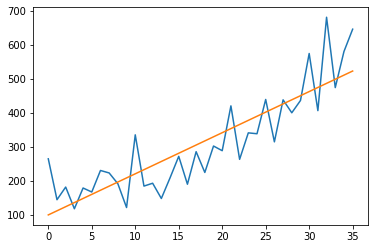

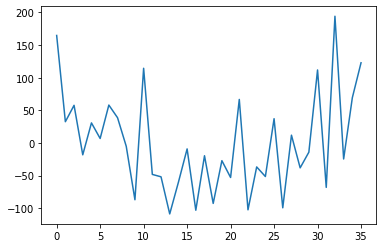

In [11]:
def parser(x):
    return datetime.strptime('201'+x, '%Y-%m')
#this function takes string as input and converts the string into datetime object

series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', 
                 header=0,
                 parse_dates=[0],
                 index_col=0,
                 squeeze=True,
                 date_parser=parser)

# fit linear model
X = [i for i in range(0, len(series))]
X = numpy.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]
# plot detrended
pyplot.plot(detrended)
pyplot.show()